In [22]:
import pandas as pd
from hipe4ml.model_handler import ModelHandler
import matplotlib.pyplot as plt

In [23]:
ModelHandl = ModelHandler()
ModelHandl.load_model_handler("/home/fchinu/Run3/Ds_pp_13TeV/ML/Training/pt0_1.5/ModelHandler_pT_0_1.5.pickle")

In [24]:
df_DsFDLHC22b1a = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train189892/LHC22b1a_NonPromptDs.parquet")
df_DplusFDLHC22b1a = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train189892/LHC22b1a_NonPromptDplus.parquet")
df_DsFDLHC23l2a = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train194380/LHC23l2a_NonPromptDs.parquet")
df_DplusFDLHC23l2a = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train194380/LHC23l2a_NonPromptDplus.parquet")
df_DsFDLHC24d3 = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train201854/LHC24d3_NonPromptDs.parquet")
df_DplusFDLHC24d3 = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train201854/LHC24d3_NonPromptDplus.parquet")

In [25]:
df_DsFDLHC22b1a = df_DsFDLHC22b1a.query("1 < fPt < 1.5")
df_DplusFDLHC22b1a = df_DplusFDLHC22b1a.query("1 < fPt < 1.5")
df_DsFDLHC23l2a = df_DsFDLHC23l2a.query("1 < fPt < 1.5")
df_DplusFDLHC23l2a = df_DplusFDLHC23l2a.query("1 < fPt < 1.5")
df_DsFDLHC24d3 = df_DsFDLHC24d3.query("1 < fPt < 1.5")
df_DplusFDLHC24d3 = df_DplusFDLHC24d3.query("1 < fPt < 1.5")

In [26]:
for df in [df_DsFDLHC22b1a,df_DplusFDLHC22b1a,df_DsFDLHC23l2a,df_DplusFDLHC23l2a,df_DsFDLHC24d3,df_DplusFDLHC24d3]:
    print(df["fFlagMcMatchRec"].unique(), df["fOriginMcRec"].unique(), df["fFlagMcDecayChanRec"].unique())  # 4 for Ds, 1 for prompt, 1(3) for Ds (Dplus) -> PhiPi

[ 4 -4] [2] [1]
[ 4 -4] [2] [3]
[-4  4] [2] [1]
[-4  4] [2] [3]
[ 4 -4] [2] [1]
[ 4 -4] [2] [3]


In [27]:
for df in [df_DsFDLHC22b1a,df_DplusFDLHC22b1a,df_DsFDLHC23l2a,df_DplusFDLHC23l2a,df_DsFDLHC24d3,df_DplusFDLHC24d3]:
    pred = ModelHandl.predict(df, False)
    df['ML_Bkg'] = pred[:,0]
    df['ML_Prompt'] = pred[:,1]
    df['ML_FD'] = pred[:,2]

    Eff = len(df.query("ML_Prompt>0.2 and ML_Bkg<0.7"))/len(df)
    print(f"len(df): {len(df)}, len(dfSel): {len(df.query('ML_Prompt>0.2 and ML_Bkg<0.7'))} Efficiency: {Eff:.3f}")

len(df): 19904, len(dfSel): 8587 Efficiency: 0.431
len(df): 1301, len(dfSel): 517 Efficiency: 0.397
len(df): 2364, len(dfSel): 1050 Efficiency: 0.444
len(df): 336, len(dfSel): 162 Efficiency: 0.482
len(df): 2397, len(dfSel): 1088 Efficiency: 0.454
len(df): 5194, len(dfSel): 2278 Efficiency: 0.439


## LHC22b1a

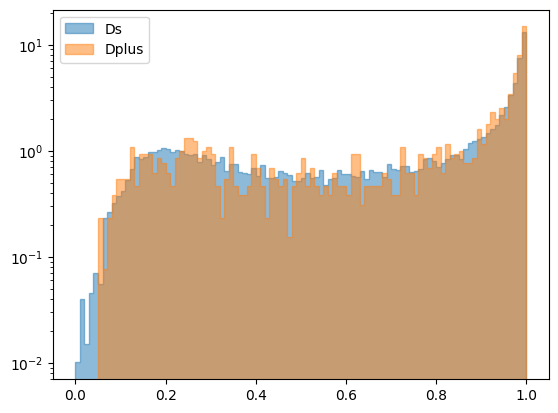

In [28]:
fig, ax = plt.subplots()
ax.hist(df_DsFDLHC22b1a["ML_FD"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Ds', fill=True, alpha=0.5)
ax.hist(df_DplusFDLHC22b1a["ML_FD"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Dplus', fill=True, alpha=0.5)
plt.legend()

## LHC23l2a1-6

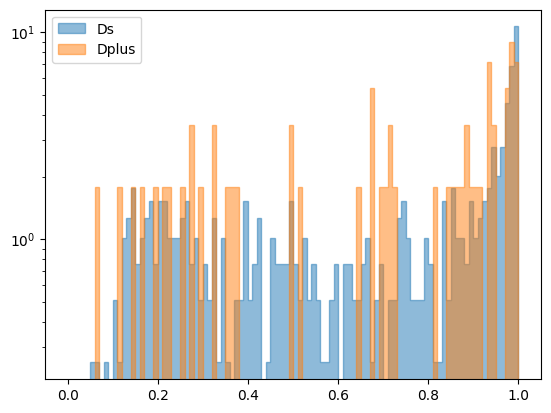

In [29]:
fig, ax = plt.subplots()
ax.hist(df_DsFDLHC23l2a["ML_FD"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Ds', fill=True, alpha=0.5)
ax.hist(df_DplusFDLHC23l2a["ML_FD"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Dplus', fill=True, alpha=0.5)
plt.legend()

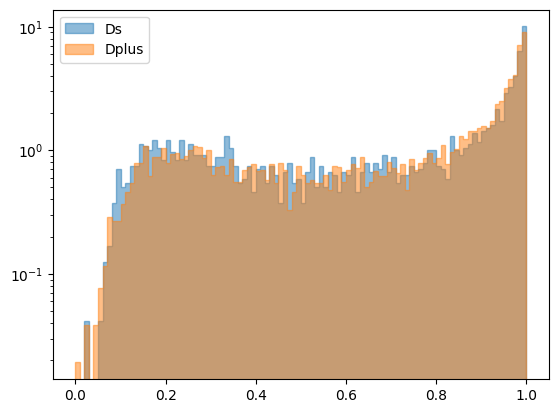

In [30]:
fig, ax = plt.subplots()
ax.hist(df_DsFDLHC24d3["ML_FD"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Ds', fill=True, alpha=0.5)
ax.hist(df_DplusFDLHC24d3["ML_FD"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Dplus', fill=True, alpha=0.5)
plt.legend()

In [31]:
df_DsPromptLHC22b1b = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train189890/LHC22b1b_PromptDs.parquet")
df_DplusPromptLHC22b1b = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train189890/LHC22b1b_PromptDplus.parquet")
df_DsPromptLHC23l2a = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train194380/LHC23l2a_PromptDs.parquet")
df_DplusPromptLHC23l2a = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train194380/LHC23l2a_PromptDplus.parquet")
df_DsPromptLHC24d3 = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train201854/LHC24d3_PromptDs.parquet")
df_DplusPromptLHC24d3 = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/Datasets/Ds_pp_run3_ml/MC/Train201854/LHC24d3_PromptDplus.parquet")

In [32]:
df_DsPromptLHC22b1b = df_DsPromptLHC22b1b.query("1 < fPt < 1.5")
df_DplusPromptLHC22b1b = df_DplusPromptLHC22b1b.query("1 < fPt < 1.5")
df_DsPromptLHC23l2a = df_DsPromptLHC23l2a.query("1 < fPt < 1.5")
df_DplusPromptLHC23l2a = df_DplusPromptLHC23l2a.query("1 < fPt < 1.5")
df_DsPromptLHC24d3 = df_DsPromptLHC24d3.query("1 < fPt < 1.5")
df_DplusPromptLHC24d3 = df_DplusPromptLHC24d3.query("1 < fPt < 1.5")

In [33]:
for df in [df_DsPromptLHC22b1b,df_DplusPromptLHC22b1b,df_DsPromptLHC23l2a,df_DplusPromptLHC23l2a,df_DsPromptLHC24d3,df_DplusPromptLHC24d3]:
    print(df["fFlagMcMatchRec"].unique(), df["fOriginMcRec"].unique(), df["fFlagMcDecayChanRec"].unique())  # 4 for Ds, 1 for prompt, 1(3) for Ds (Dplus) -> PhiPi

[-4  4] [1] [1]
[-4  4] [1] [3]
[-4  4] [1] [1]
[ 4 -4] [1] [3]
[-4  4] [1] [1]
[ 4 -4] [1] [3]


In [34]:
for df in [df_DsPromptLHC22b1b,df_DplusPromptLHC22b1b,df_DsPromptLHC23l2a,df_DplusPromptLHC23l2a,df_DsPromptLHC24d3,df_DplusPromptLHC24d3]:
    pred = ModelHandl.predict(df, False)
    df['ML_Bkg'] = pred[:,0]
    df['ML_Prompt'] = pred[:,1]
    df['ML_FD'] = pred[:,2]

    Eff = len(df.query("ML_Prompt>0.2 and ML_Bkg<0.7"))/len(df)
    print(f"len(df): {len(df)}, len(dfSel): {len(df.query('ML_Prompt>0.2 and ML_Bkg<0.7'))} Efficiency: {Eff:.3f}")

len(df): 4425, len(dfSel): 4316 Efficiency: 0.975
len(df): 1173, len(dfSel): 1064 Efficiency: 0.907
len(df): 750, len(dfSel): 720 Efficiency: 0.960
len(df): 378, len(dfSel): 330 Efficiency: 0.873
len(df): 634, len(dfSel): 601 Efficiency: 0.948


len(df): 5490, len(dfSel): 4742 Efficiency: 0.864


## LHC22b1b

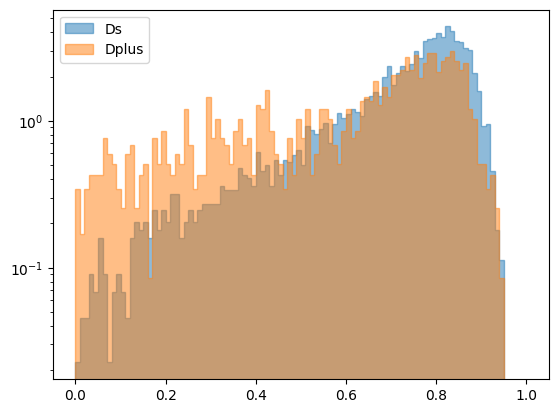

In [35]:
fig, ax = plt.subplots()
ax.hist(df_DsPromptLHC22b1b["ML_Prompt"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Ds', fill=True, alpha=0.5)
ax.hist(df_DplusPromptLHC22b1b["ML_Prompt"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Dplus', fill=True, alpha=0.5)
plt.legend()

## LHC23l2a1-6

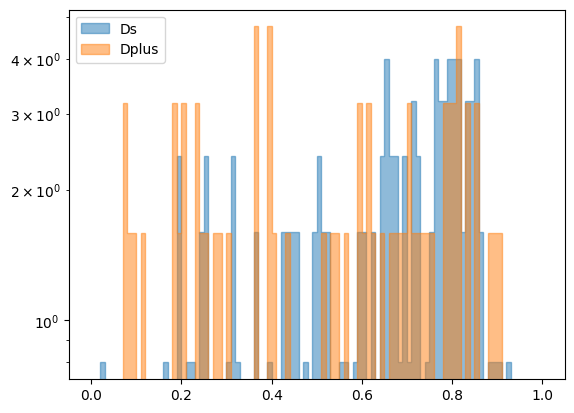

In [36]:
fig, ax = plt.subplots()
ax.hist(df_DsPromptLHC23l2a["ML_Prompt"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Ds', fill=True, alpha=0.5)
ax.hist(df_DplusPromptLHC23l2a["ML_Prompt"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Dplus', fill=True, alpha=0.5)
plt.legend()

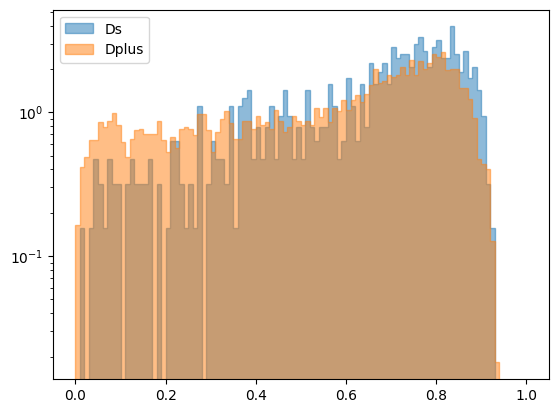

In [38]:
fig, ax = plt.subplots()
ax.hist(df_DsPromptLHC24d3["ML_Prompt"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Ds', fill=True, alpha=0.5)
ax.hist(df_DplusPromptLHC24d3["ML_Prompt"], bins=100, range=(0,1), density=True, log=True, histtype='step', label='Dplus', fill=True, alpha=0.5)
plt.legend()